# L13 Notes: Random Forests

### Setup imports

In [3]:
# !pip install pandas
# !pip install matplotlib
# !pip install scikit-learn

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_covtype

### Load the data
https://archive.ics.uci.edu/dataset/31/covertype

In [7]:
data = fetch_covtype()

X, y = data.data, data.target

print(X.shape)
print(y.shape)

(581012, 54)
(581012,)


In [8]:
# only use the first 10,000 rows
X_small = X[:10_000]
y_small = y[:10_000]

print(X_small.shape)
print(y_small.shape)

(10000, 54)
(10000,)


### Inspect the data

In [10]:
y_small_series = pd.Series(y_small)

y_small_series.value_counts()

4    1620
5    1583
2    1462
1    1375
7    1349
6    1349
3    1262
Name: count, dtype: int64

### Train-test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_small, y_small, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 54)
(2500, 54)
(7500,)
(2500,)


### Define model and parameter grid

In [13]:
rf_classifier = RandomForestClassifier(bootstrap=True, random_state=42)

hyperparameter_grid = {
    'n_estimators': [1, 50, 100],
    'max_depth': [None, 2, 16],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.1, 0.5, 0.75]
}

### Run the grid search

In [15]:
grid = GridSearchCV(rf_classifier, hyperparameter_grid, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 2, ...], 'max_features': ['sqrt', 'log2'], 'max_samples': [0.1, 0.5, ...], 'n_estimators': [1, 50, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and

### Get the best parameter model

In [16]:
grid.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.75,
 'n_estimators': 100}

In [17]:
best_rf = grid.best_estimator_

best_rf

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

### Look at feature importances

In [26]:
importances = best_rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': range(54),
    'importance': importances
})

feature_importance_df.sort_values(by='importance', ascending=False)

,feature,importance
0,0,0.220170
5,5,0.099349
9,9,0.073422
3,3,0.064402
4,4,0.056217
6,6,0.055267
1,1,0.050930
8,8,0.050266
7,7,0.048473
13,13,0.043085


### Evaluate the model on the test set

In [28]:
y_pred = best_rf.predict(X_test)

model_accuracy = accuracy_score(y_test, y_pred)

print(model_accuracy)

0.8492


In [30]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.79      0.76      0.77       346
           2       0.79      0.72      0.75       364
           3       0.84      0.72      0.78       335
           4       0.89      0.98      0.93       396
           5       0.88      0.94      0.91       394
           6       0.82      0.84      0.83       351
           7       0.93      0.96      0.95       314

    accuracy                           0.85      2500
   macro avg       0.85      0.85      0.85      2500
weighted avg       0.85      0.85      0.85      2500



### Activity
We tested this parameter grid:

hyperparameter_grid = {
    'n_estimators': [1, 50, 100],
    'max_depth': [None, 2, 16],
    'max_features': ['sqrt', 'log2'],
    'max_samples': [0.1, 0.5, 0.75]
}

and found that these were the best hyperparams:
{
 'max_depth': None,
 'max_features': 'sqrt',
 'max_samples': 0.75,
 'n_estimators': 100
 }

Now, choose one of the hyper params and make a plot of the test set prediction accuracy as you vary that parameter. 

In [35]:
# define a list of the values of the hyperparameter to test
max_samples_list = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]

# define a list to hold the score from each of the models
accuracy_list = []

# loop over the parameter values to test
for max_sample_value in max_samples_list:

    # define the hyperparameters of the model
    rf = RandomForestClassifier(
        bootstrap=True,
        max_depth=None,
        max_features='sqrt',
        max_samples=max_sample_value # this is the parameter we are changing
    )

    # train the model
    rf.fit(X_train, y_train)

    # get test set predictions
    y_pred = rf.predict(X_test)
    
    # get the accuracy score
    acc = accuracy_score(y_test, y_pred)

    # add the accuracy score to the accuracy list
    accuracy_list.append(acc)

# make a line (or bar) graph with the parameter value on the x axis and accuracy on the y-axis

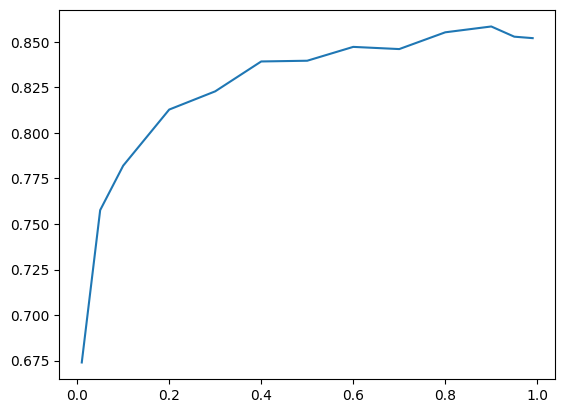

In [36]:
plt.plot(max_samples_list, accuracy_list)